In [1]:
import bluepysnap
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import h5py   

In [2]:
# Extract spikes
# Data Folder can be downloaded from 10.5281/zenodo.14187063
file_path = './Data/spikes_ndam_met_aged.csv'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df['spikes_met'].sum(), df['spikes_ndam'].sum(),df['spikes_aged'].sum(),)

16893 14640 17135


In [3]:
layers = np.unique(df['layer'])
# Create empty lists to store counts
count_young_spikes = []
count_aged_spikes = []
# Count the number of entries for each layer
for layer in layers:
    count_young_spikes.append((df[df.layer == layer]["spikes_met"]).sum())
    count_aged_spikes .append((df[df.layer == layer]["spikes_aged"]).sum())

diff = np.asarray(count_aged_spikes ) -np.asarray(count_young_spikes)

In [6]:
# Calculate the difference between 'spikes_aged' and 'spikes_met' for each cell
df['diff_spikes'] = df['spikes_aged'] - df['spikes_met']

# Filter out rows where the difference is zero (if you're only interested in rows where there's a non-zero difference)
df_diff = df[df['diff_spikes'] != 0]

# Group by 'layer' and 'etype' to see which entries have non-zero differences
grouped_diff = df_diff.groupby(['layer', 'etype'])[['diff_spikes']].sum().reset_index()

# Display the result
print(grouped_diff)

    layer   etype  diff_spikes
0       1    cNAC            2
1       2  cADpyr            2
2       2    cNAC            1
3       3  cADpyr           25
4       3    cNAC            1
5       3    dNAC            1
6       4  cACint            2
7       4  cADpyr           86
8       4    cNAC            3
9       4   cSTUT           -4
10      4    dNAC            0
11      5   bSTUT           -9
12      5  cACint            4
13      5  cADpyr           35
14      5    cNAC           10
15      5   cSTUT           19
16      5    dNAC            2
17      5   dSTUT           14
18      6    bNAC           -3
19      6   bSTUT            7
20      6  cADpyr           40
21      6    cNAC            0
22      6   cSTUT            1
23      6   dSTUT            3


In [7]:
import seaborn as sns

In [8]:
# Assuming filtered_df is your DataFrame
unique_etypes = np.unique(grouped_diff['etype'])
palette = sns.color_palette("Paired", n_colors=len(unique_etypes))

# Create a dictionary mapping etypes to their corresponding colors
color_etype__dict = {etype: palette[i] for i, etype in enumerate(unique_etypes)}

# Display the dictionary
print(color_etype__dict)

{'bNAC': (0.6509803921568628, 0.807843137254902, 0.8901960784313725), 'bSTUT': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), 'cACint': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), 'cADpyr': (0.2, 0.6274509803921569, 0.17254901960784313), 'cNAC': (0.984313725490196, 0.6039215686274509, 0.6), 'cSTUT': (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), 'dNAC': (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), 'dSTUT': (1.0, 0.4980392156862745, 0.0)}


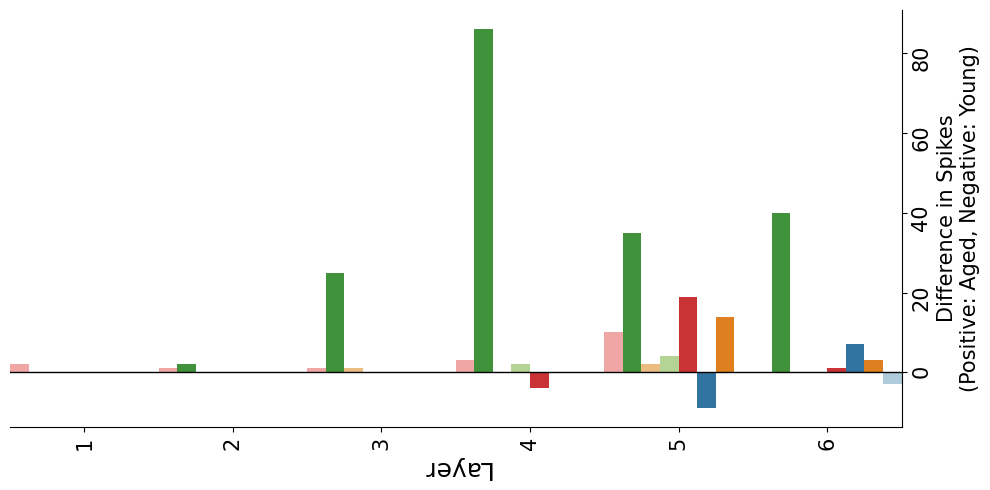

In [16]:
# Create the figure for the main plot
plt.figure(figsize=(10, 5))

# Plot the bar plot without the legend
sns.barplot(data=grouped_diff, x='layer', y='diff_spikes', hue='etype', width=1., palette=color_etype__dict, legend=False)

# Add a horizontal line at y=0 to distinguish between positive and negative values
plt.axhline(0, color='black', linewidth=1)

# Add labels
plt.xlabel('Layer', fontsize=18, rotation=180)
plt.ylabel('Difference in Spikes\n(Positive: Aged, Negative: Young)', fontsize=15)

# Move y-axis to the right and configure ticks
plt.gca().yaxis.tick_right()   # Move the ticks to the right side
plt.gca().yaxis.set_label_position("right")  # Move y-axis label to the right
plt.gca().spines['left'].set_color('none')  # Remove the left spine
plt.gca().spines['top'].set_color('none')   # Remove the top spine

# Rotate x-axis ticks and y-axis ticks
plt.xticks(rotation=90, fontsize=15)  # Rotate x-axis ticks
plt.yticks(rotation=90, fontsize=15)  # Rotate y-axis ticks

plt.tight_layout()
#Save the main plot
#plt.savefig("./RESULTS/Figure4c-bis.pdf", format="pdf", bbox_inches='tight')

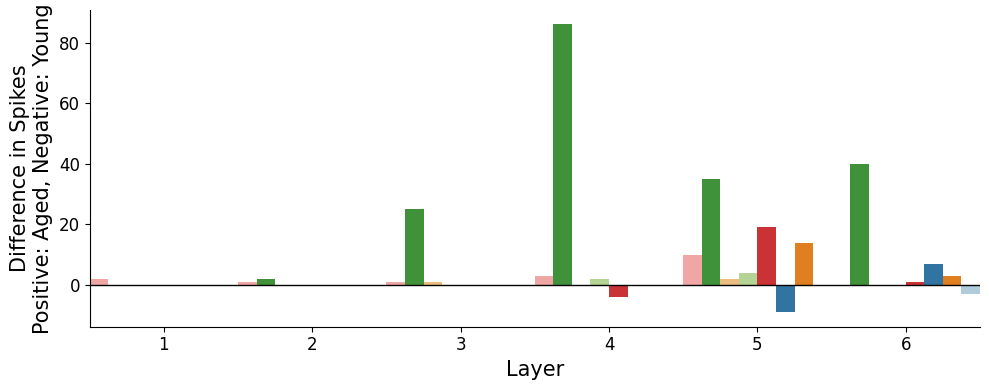

In [27]:
# Create the figure for the main plot
plt.figure(figsize=(10, 4))

# Plot the bar plot without the legend
sns.barplot(data=grouped_diff, x='layer', y='diff_spikes', hue='etype', width=1., palette=color_etype__dict, legend=False)

# Add a horizontal line at y=0 to distinguish between positive and negative values
plt.axhline(0, color='black', linewidth=1)

# Add labels
plt.xlabel('Layer', fontsize=15, rotation=0)
plt.ylabel('Difference in Spikes\nPositive: Aged, Negative: Young', fontsize=15)

# Move y-axis to the right and configure ticks
#plt.gca().yaxis.tick_right()   # Move the ticks to the right side
#plt.gca().yaxis.set_label_position("right")  # Move y-axis label to the right
plt.gca().spines['right'].set_color('none')  # Remove the left spine
plt.gca().spines['top'].set_color('none')   # Remove the top spine

# Rotate x-axis ticks and y-axis ticks
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis ticks
plt.yticks(rotation=0, fontsize=12)  # Rotate y-axis ticks

plt.tight_layout()
#Save the main plot
#plt.savefig("./RESULTS/Figure6c.pdf", format="pdf", bbox_inches='tight')

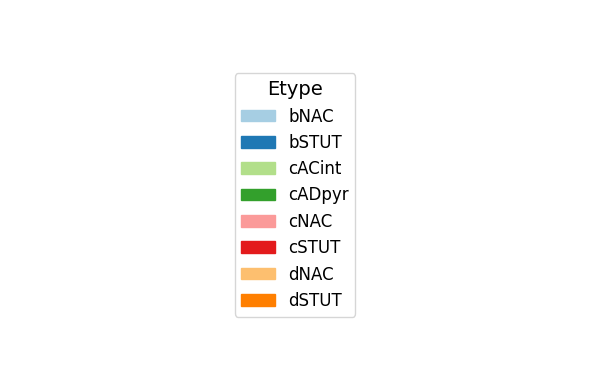

In [28]:
from matplotlib.patches import Patch
# Create legend handles
handles = [Patch(color=color, label=label) for label, color in color_etype__dict.items()]

# Create the plot
plt.figure(figsize=(6, 4))

# Add the legend with the custom handles
plt.legend(handles=handles, loc='center', fontsize=12, title='Etype', title_fontsize=14, ncol=1)

# Remove the axis from the plot
ax = plt.gca()  # Get the current axis
ax.set_axis_off()  # Remove axis

# Show the plot
plt.tight_layout()
#plt.savefig("../Final_Figures/RESULTS/Figure5AB-legend.pdf", format="pdf", bbox_inches='tight')

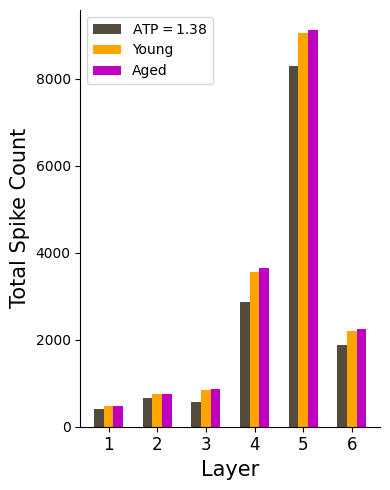

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each spike type
color_ndam = '#544B3D'
color_met = '#FFA400'
color_aged = 'm'
colors = [color_ndam, color_met, color_aged]


# Columns representing the spike counts
spike_columns = ['spikes_ndam', 'spikes_met', 'spikes_aged']
label_simulation=['$\mathrm{ATP} = 1.38$', 'Young', 'Aged']

# Calculate the sum of spikes per layer and per etype for each spike type
spike_sums_layer = df.groupby('layer')[spike_columns].sum()
spike_sums_etype = df.groupby('etype')[spike_columns].sum()

# Set up positions for grouped bars
layers = spike_sums_layer.index
etypes = spike_sums_etype.index
bar_width = 0.2  # Width of each bar
x_layer = np.arange(len(layers))  # Base x locations for layers
x_etype = np.arange(len(etypes))  # Base x locations for etypes

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(4, 5))

# Plot total spikes per layer
for i, col in enumerate(spike_columns):
    ax1.bar(x_layer + i * bar_width, spike_sums_layer[col], width=bar_width, label=label_simulation[i], color=colors[i])

# Set axis labels and title
ax1.set_xlabel('Layer', fontsize=15)
#ax1.set_title('Total Spikes per Cortical Layer', fontsize=15)
ax1.set_xticks(x_layer + bar_width)
ax1.set_xticklabels(layers, fontsize=12)

# Remove the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Common Y-axis label and legend
ax1.set_ylabel('Total Spike Count', fontsize=15)
#fig.suptitle('Total Spikes Grouped by Cortical Layer and Etype', fontsize=15)

# Display the legend
ax1.legend(loc='best')

# Adjust layout
plt.tight_layout()
#plt.savefig("../Final_Figures/Supplementary_Figures/SF4.pdf", format="pdf", bbox_inches='tight')

In [21]:
spike_sums_layer

,spikes_ndam,spikes_met,spikes_aged
layer,,,
1,400,483,485
2,652,749,752
3,562,849,876
4,2864,3558,3645
5,8283,9047,9122
6,1879,2207,2255
